Load Libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


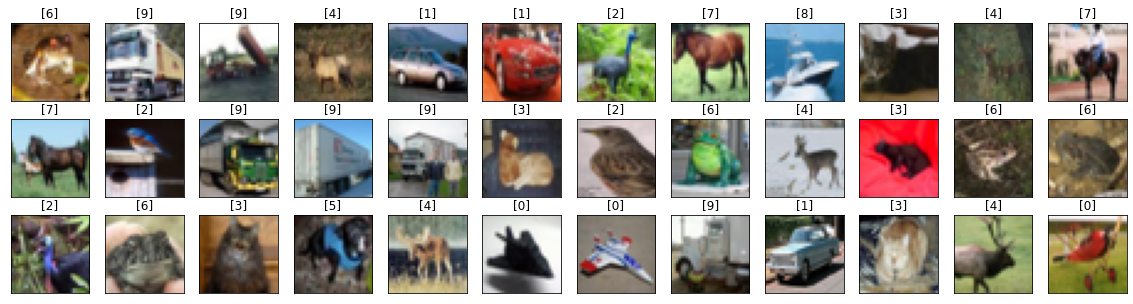

In [8]:
fig = plt.figure(figsize=(20, 5))
for i in range(36):
  ax = fig.add_subplot(3, 12, (i+1), xticks = [], yticks = [])
  ax.imshow(X_train[i], cmap = 'gray')
  ax.set_title(Y_train[i])

In [9]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [11]:
import numpy as np
num_classes = len(np.unique(Y_train))

Y_train = to_categorical(Y_train, num_classes=num_classes)
Y_test = to_categorical(Y_test, num_classes=num_classes)

In [13]:
X_train, X_Valid = X_train[5000:], X_train[:5000]
Y_train, Y_valid = Y_train[5000:], Y_train[:5000]

print('X_train ', X_train.shape)
print('X_Valid ', X_Valid.shape)
print('X_test ', X_test.shape)

print('Y_train ', Y_train.shape)
print('Y_valid ', Y_valid.shape)
print('Y_test ', Y_test.shape)

X_train  (45000, 32, 32, 3)
X_Valid  (5000, 32, 32, 3)
X_test  (10000, 32, 32, 3)
Y_train  (45000, 10)
Y_valid  (5000, 10)
Y_test  (10000, 10)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [17]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

best_cifar1 = ModelCheckpoint(filepath = 'cifar10_1_model.wights.best.hdf5', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train, 
                    batch_size = 16, 
                    epochs = 50, 
                    verbose=1, 
                    callbacks = [best_cifar1], 
                    validation_data = (X_test, Y_test),
                  )

Epoch 1/50
2813/2813 [==============================] - ETA: 0s - loss: 1.5291 - accuracy: 0.4470
Epoch 1: val_loss improved from inf to 1.29169, saving model to cifar10_1_model.wights.best.hdf5
2813/2813 [==============================] - 25s 5ms/step - loss: 1.5291 - accuracy: 0.4470 - val_loss: 1.2917 - val_accuracy: 0.5593
Epoch 2/50
2803/2813 [============================>.] - ETA: 0s - loss: 1.2366 - accuracy: 0.5737
Epoch 2: val_loss improved from 1.29169 to 1.26096, saving model to cifar10_1_model.wights.best.hdf5
2813/2813 [==============================] - 14s 5ms/step - loss: 1.2372 - accuracy: 0.5735 - val_loss: 1.2610 - val_accuracy: 0.5593
Epoch 3/50
2804/2813 [============================>.] - ETA: 0s - loss: 1.2167 - accuracy: 0.5890
Epoch 3: val_loss improved from 1.26096 to 1.12597, saving model to cifar10_1_model.wights.best.hdf5
2813/2813 [==============================] - 14s 5ms/step - loss: 1.2162 - accuracy: 0.5889 - val_loss: 1.1260 - val_accuracy: 0.6321
Epoch

KeyboardInterrupt: ignored

In [22]:
model.load_weights('cifar10_1_model.wights.best.hdf5')

In [24]:
y_hat = model.predict(X_test)

In [25]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

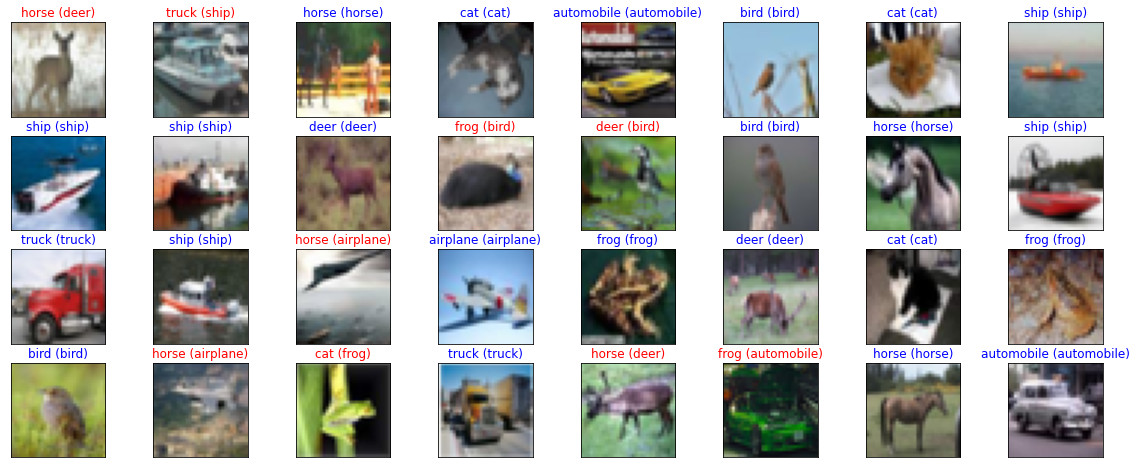

In [26]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))